In [1]:
import surprise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.30_SistemasDeRecomendacao/ratings.txt',sep=" ",
                  names=['user-id', 'item-id', 'rating-value'])

In [4]:
dados

,user-id,item-id,rating-value
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [5]:
dados.dtypes

user-id           int64
item-id           int64
rating-value    float64
dtype: object

In [6]:
dados.isnull().sum()

user-id         0
item-id         0
rating-value    0
dtype: int64

In [7]:
dados.value_counts()

user-id  item-id  rating-value
308      12       4.0             2
1        1        2.0             1
987      253      2.5             1
         247      2.5             1
         248      2.5             1
                                 ..
485      234      3.5             1
         233      4.0             1
         220      3.0             1
         219      3.5             1
1508     806      3.5             1
Length: 35496, dtype: int64

In [8]:
dados['item-id'].value_counts()

7       1044
11       931
2        915
207      883
1        866
        ... 
1467       1
1468       1
1469       1
1470       1
2071       1
Name: item-id, Length: 2071, dtype: int64

In [9]:
len(dados['item-id'].unique())

2071

In [10]:
len(dados['user-id'].unique())

1508

In [11]:
dados.shape[0]

35497

In [12]:
dados['rating-value'].value_counts()

4.0    9171
3.0    7877
3.5    7142
2.5    4392
2.0    3113
1.5    1601
1.0    1141
0.5    1060
Name: rating-value, dtype: int64

<AxesSubplot:>

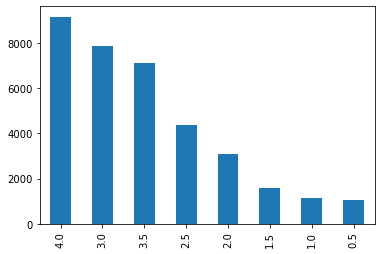

In [13]:
dados['rating-value'].value_counts().plot(kind='bar')

In [14]:
menorrating=dados['rating-value'].min()
maiorrating=dados['rating-value'].max()
print('Variação de rating: {0} a {1}'.format(menorrating,maiorrating))

Variação de rating: 0.5 a 4.0


In [15]:
#Redefinindo o range de ratings, pois o padrao do surprise é de 1 a 5
reader=surprise.Reader(rating_scale=(0.5,4.0))
dados_surprise=surprise.Dataset.load_from_df(dados,reader)

In [16]:
#Escolhendo o algoritimo e treinando o modelo
dados_treino=dados_surprise.build_full_trainset() #Dados de treino sao todos os dados preenchidos da tabela dados
modelo=surprise.SVDpp(n_factors=20)
modelo.fit(dados_treino)

In [17]:
dados_teste=dados_treino.build_anti_testset() #Dados de teste sao os dados faltantes da tabela dados
previsoes=modelo.test(dados_teste)

In [18]:
previsoes

[Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.5418629530307655, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=3.0028030537791928, est=2.912250934158468, details={'was_impossible': False}),
 Prediction(uid=1, iid=15, r_ui=3.0028030537791928, est=3.055829369614567, details={'was_impossible': False}),
 Prediction(uid=1, iid=16, r_ui=3.0028030537791928, est=3.506413534057054, details={'was_impossible': False}),
 Prediction(uid=1, iid=17, r_ui=3.0028030537791928, est=3.0056124523010688, details={'was_impossible': False}),
 Prediction(uid=1, iid=18, r_ui=3.0028030537791928, est=3.433050026328523, details={'was_impossible': False}),
 Prediction(uid=1, iid=19, r_ui=3.0028030537791928, est=3.251556703101177, details={'was_impossible': False}),
 Prediction(uid=1, iid=20, r_ui=3.0028030537791928, est=3.043996361788391, details={'was_impossible': False}),
 Prediction(uid=1, iid=21, r_ui=3.0028030537791928, est=3.0325158245485078, details={'was_impossible': False})

In [19]:
len(previsoes)

3087574

In [20]:
from collections import defaultdict
def obtem_top_n(previsoes,n=5):
    top_n=defaultdict(list)
    for usuario,filme,_,previsao,_ in previsoes:
        top_n[usuario].append((filme,previsao)) #Adiciona os pares de chave:valor ao dicionario
    for usuario, previsoes_usuario in top_n.items(): #usuario(chave), previsoes_usuario(valor:filme,previsao)
        previsoes_usuario.sort(key=lambda x: x[1], reverse=True) #Ordena as previsoes de rating do maior para o menor
        top_n[usuario]=previsoes_usuario[:n] #Salva somente os primeiros n valores
    return top_n

In [21]:
top_5=obtem_top_n(previsoes)

In [22]:
top_5

defaultdict(list,
            {1: [(286, 4.0),
              (805, 3.9604140710660563),
              (675, 3.8551837483127476),
              (318, 3.843530293638694),
              (572, 3.8307519394045)],
             2: [(286, 3.669187299477268),
              (805, 3.513856363093282),
              (307, 3.4814974054270205),
              (335, 3.4809604845253643),
              (658, 3.4293116489532864)],
             3: [(2, 4.0),
              (7, 4.0),
              (205, 4.0),
              (241, 4.0),
              (1, 3.9501730707471117)],
             4: [(286, 3.55298279439778),
              (363, 3.294384519905668),
              (218, 3.2885832782290287),
              (689, 3.2870934391332707),
              (805, 3.2522980528102656)],
             5: [(286, 3.874489055351984),
              (805, 3.7854429316888765),
              (335, 3.6977598531449276),
              (689, 3.6546438973654225),
              (293, 3.6292948726604863)],
             6: [(286, 4.0),

In [23]:
a=pd.DataFrame(top_5)

In [24]:
a

,1,2,3,4,5,6,7,8,9,10,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
0,"(286, 4.0)","(286, 3.669187299477268)","(2, 4.0)","(286, 3.55298279439778)","(286, 3.874489055351984)","(286, 4.0)","(286, 3.491503369904623)","(286, 4.0)","(286, 3.8816628425634496)","(286, 3.897019309250209)",...,"(286, 4.0)","(286, 3.108442712520667)","(286, 3.3598974899044283)","(286, 3.712748760284617)","(286, 4.0)","(286, 3.94593976297327)","(286, 4.0)","(286, 3.504336059872622)","(286, 3.926006088319)","(286, 3.555916564168184)"
1,"(805, 3.9604140710660563)","(805, 3.513856363093282)","(7, 4.0)","(363, 3.294384519905668)","(805, 3.7854429316888765)","(805, 4.0)","(805, 3.467820205646015)","(335, 3.9707076326820196)","(805, 3.7608647622486093)","(805, 3.7837820817949246)",...,"(805, 4.0)","(805, 2.995145394823112)","(335, 3.1944536829478114)","(675, 3.6074676585914247)","(805, 3.8902572068916252)","(805, 3.7781459380529347)","(1118, 4.0)","(805, 3.3986819749773214)","(805, 3.7287556941282545)","(318, 3.536656887155605)"
2,"(675, 3.8551837483127476)","(307, 3.4814974054270205)","(205, 4.0)","(218, 3.2885832782290287)","(335, 3.6977598531449276)","(335, 3.9867418473062206)","(705, 3.3811115970141223)","(805, 3.9303606962997244)","(705, 3.7228270300774144)","(363, 3.713559402512558)",...,"(675, 3.9594238947818083)","(335, 2.9451098593804863)","(705, 3.1448130421773564)","(805, 3.6040882096280114)","(363, 3.8630538838315087)","(335, 3.757492481125743)","(805, 3.9897638363776324)","(318, 3.335600369631656)","(675, 3.6955936223445294)","(805, 3.5266405247632315)"
3,"(318, 3.843530293638694)","(335, 3.4809604845253643)","(241, 4.0)","(689, 3.2870934391332707)","(689, 3.6546438973654225)","(658, 3.971102350006482)","(363, 3.3290325278049564)","(318, 3.9240925033814946)","(658, 3.715229311855876)","(307, 3.70117332588012)",...,"(293, 3.9258734572584113)","(318, 2.938794334613868)","(307, 3.1420458933040183)","(299, 3.5882187564280943)","(335, 3.827325276628998)","(689, 3.7364642788386844)","(91, 3.9650259528997376)","(675, 3.3234241128402475)","(318, 3.6682578513799724)","(297, 3.459989619316153)"
4,"(572, 3.8307519394045)","(658, 3.4293116489532864)","(1, 3.9501730707471117)","(805, 3.2522980528102656)","(293, 3.6292948726604863)","(705, 3.965131648965768)","(293, 3.3222868893463224)","(675, 3.8491399331284475)","(335, 3.7047511567843157)","(689, 3.6770272171142167)",...,"(363, 3.925312958853952)","(675, 2.912025195989026)","(363, 3.1336078178733002)","(335, 3.535905564713902)","(689, 3.8228606867822394)","(218, 3.718549594617893)","(335, 3.955204900161141)","(363, 3.3188788240604126)","(363, 3.6664673545245736)","(689, 3.4481915250987885)"


In [25]:
for usuario, previsoes_usuario in top_5.items(): #Print apenas dos filmes, sem os ratings previstos
    print(usuario, [filme for (filme,_) in previsoes_usuario])

1 [286, 805, 675, 318, 572]
2 [286, 805, 307, 335, 658]
3 [2, 7, 205, 241, 1]
4 [286, 363, 218, 689, 805]
5 [286, 805, 335, 689, 293]
6 [286, 805, 335, 658, 705]
7 [286, 805, 705, 363, 293]
8 [286, 335, 805, 318, 675]
9 [286, 805, 705, 658, 335]
10 [286, 805, 363, 307, 689]
11 [286, 335, 805, 318, 299]
12 [286, 805, 696, 126, 363]
13 [318, 286, 335, 805, 675]
14 [17, 675, 286, 9, 658]
15 [805, 286, 318, 705, 11]
16 [286, 805, 318, 335, 563]
17 [286, 805, 335, 675, 307]
18 [286, 805, 363, 689, 705]
19 [286, 805, 335, 658, 689]
20 [286, 805, 299, 318, 696]
21 [43, 68, 96, 189, 197]
22 [68, 96, 167, 189, 218]
23 [286, 805, 363, 299, 218]
24 [286, 218, 307, 689, 309]
25 [286, 696, 658, 218, 805]
26 [286, 335, 805, 705, 658]
27 [286, 218, 318, 307, 363]
28 [286, 675, 702, 805, 307]
29 [347, 363, 335, 638, 689]
30 [805, 286, 347, 335, 365]
31 [286, 218, 805, 705, 299]
32 [286, 805, 705, 658, 363]
33 [286, 805, 675, 363, 638]
34 [286, 318, 805, 335, 675]
35 [286, 805, 705, 299, 689]
36 [35, 4

899 [286, 805, 675, 335, 689]
900 [286, 805, 363, 335, 293]
901 [286, 805, 307, 689, 563]
902 [805, 286, 658, 675, 335]
903 [286, 335, 805, 307, 675]
904 [286, 675, 805, 318, 335]
905 [286, 335, 805, 293, 307]
906 [286, 805, 335, 689, 1091]
907 [286, 805, 318, 335, 299]
908 [286, 705, 689, 307, 805]
909 [286, 318, 705, 805, 335]
910 [805, 335, 286, 318, 363]
911 [286, 675, 335, 805, 318]
912 [286, 805, 705, 126, 414]
913 [286, 805, 335, 563, 689]
914 [286, 805, 318, 335, 675]
915 [286, 805, 363, 318, 335]
916 [286, 318, 805, 705, 658]
917 [286, 805, 318, 335, 658]
918 [286, 318, 335, 705, 805]
919 [286, 805, 363, 658, 318]
920 [286, 805, 318, 705, 563]
921 [286, 512, 805, 1118, 363]
922 [286, 805, 689, 335, 728]
923 [286, 805, 307, 705, 299]
924 [286, 335, 318, 805, 307]
925 [286, 335, 805, 689, 318]
926 [286, 805, 335, 363, 675]
927 [286, 805, 705, 299, 318]
928 [286, 805, 658, 702, 335]
929 [286, 805, 335, 318, 705]
930 [286, 805, 318, 335, 293]
931 [286, 658, 805, 189, 400]
932 [286

In [27]:
# Fazendo a previsao apenas para 1 usuario
previsao_usuario=modelo.predict(uid=1, iid=13)
rating=previsao_usuario.est
rating

3.5418629530307655

In [28]:
#Validando o modelo
from surprise.model_selection import train_test_split
dadostreino, dadosteste=train_test_split(dados_surprise, test_size=0.3)
modelo=surprise.SVDpp(n_factors=20)
modelo.fit(dadostreino)
previsoes_gerais=modelo.test(dadosteste)

In [29]:
previsoes_gerais

[Prediction(uid=424, iid=244, r_ui=3.5, est=2.251687906683385, details={'was_impossible': False}),
 Prediction(uid=457, iid=256, r_ui=2.0, est=2.629043862504863, details={'was_impossible': False}),
 Prediction(uid=150, iid=10, r_ui=2.5, est=2.802678481200999, details={'was_impossible': False}),
 Prediction(uid=547, iid=205, r_ui=2.5, est=3.0248620718703205, details={'was_impossible': False}),
 Prediction(uid=396, iid=712, r_ui=3.5, est=3.3956223742818117, details={'was_impossible': False}),
 Prediction(uid=79, iid=432, r_ui=1.0, est=3.252175696483564, details={'was_impossible': False}),
 Prediction(uid=368, iid=235, r_ui=1.5, est=2.571341213537056, details={'was_impossible': False}),
 Prediction(uid=75, iid=257, r_ui=3.0, est=2.702686499566662, details={'was_impossible': False}),
 Prediction(uid=457, iid=216, r_ui=2.0, est=3.0901658457295373, details={'was_impossible': False}),
 Prediction(uid=566, iid=214, r_ui=3.0, est=2.6533368121941074, details={'was_impossible': False}),
 Predicti

In [30]:
from surprise import accuracy
accuracy.rmse(previsoes_gerais)

RMSE: 0.8031


0.8031340496056074

In [31]:
from surprise.model_selection import GridSearchCV

In [44]:
param={'lr_all':[1,0.5,0.005,0.001],'reg_all':[1,0.05,0.02,0.01],'n_factors':[20,50,100]}
#modelo1=surprise.SVDpp(n_factors=20) #modelo=surprise.SVDpp(n_factors=20)
otimiza=surprise.model_selection.GridSearchCV(surprise.SVDpp, param, cv=3, n_jobs=-1, measures=['rmse'])
otimiza.fit(dados_surprise)
otimiza.best_params

{'rmse': {'lr_all': 0.005, 'reg_all': 0.01, 'n_factors': 20}}

In [45]:
#Utilizando os parametros otimizados novamente no modelo, para medir a sua performance
from surprise.model_selection import train_test_split
dadostreino, dadosteste=train_test_split(dados_surprise, test_size=0.3)
modelo=surprise.SVDpp(n_factors=20,lr_all=0.005,reg_all=0.01)
modelo.fit(dadostreino)
previsoes_gerais=modelo.test(dadosteste)
accuracy.rmse(previsoes_gerais)

RMSE: 0.8015


0.8014705444841579

In [47]:
#Mostrando os daddos vizinhos (recomendado para o cold start)
from surprise import KNNBasic
dados_preenchidos=dados_surprise.build_full_trainset()
modelo2=KNNBasic(sim_options={'name':'cosine','user_based':False})
modelo2.fit(dados_preenchidos)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [48]:
vizinhos=modelo2.get_neighbors(343,k=10)

In [49]:
vizinhos

[58, 90, 102, 126, 147, 159, 168, 171, 193, 236]

In [51]:
for filme in vizinhos:
    print(filme)

58
90
102
126
147
159
168
171
193
236
